In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [129]:
df_test = pd.read_csv('filled_train_test_dataset.csv')
df_test.drop(labels=df_test.columns[0],axis=1,inplace=True)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [3]:
temp = df_test[['BsmtUnfSF']]

In [4]:
temp.fillna(np.mean(temp.BsmtUnfSF), inplace = True)

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
temp.isnull().sum()

BsmtUnfSF    0
dtype: int64

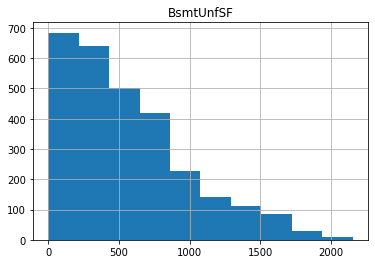

In [6]:
temp.hist()
plt.show()

In [7]:
import random

In [8]:
new_temp = []
p = 0
for i in np.arange(0, len(temp.BsmtUnfSF)):
    p = np.mean(random.sample(list(temp.BsmtUnfSF), k = 300))
    new_temp.append(p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172201D2D68>]],
      dtype=object)

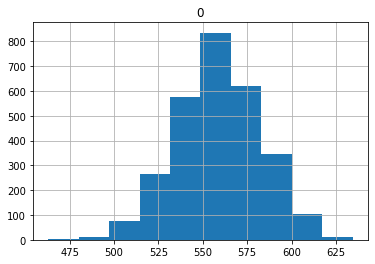

In [9]:
pd.DataFrame(new_temp).hist()

In [10]:
temp.iloc[658:670]
len(new_temp)

2846

In [11]:
temp = pd.DataFrame(np.arange(1,11))
temp

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [12]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

In [13]:
np.std(temp)

0    2.872281
dtype: float64

In [14]:
np.mean(temp)

0    5.5
dtype: float64

In [15]:
StandardScaler().fit_transform(temp)

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [16]:
MinMaxScaler().fit_transform(temp)

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

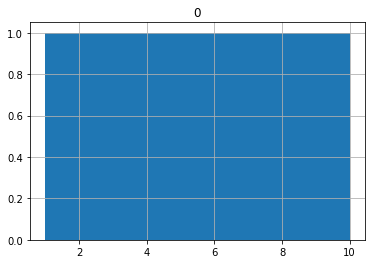

In [17]:
temp.hist()
plt.show()

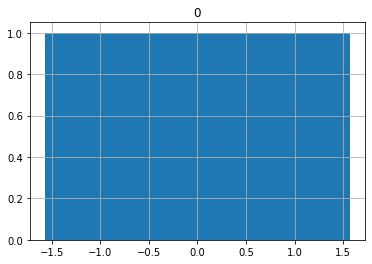

In [18]:
pd.DataFrame(StandardScaler().fit_transform(temp)).hist()
plt.show()

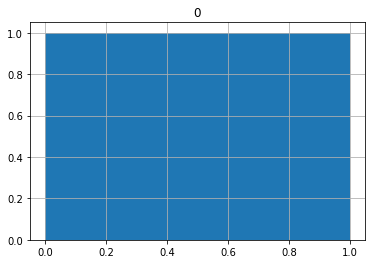

In [19]:
pd.DataFrame(MinMaxScaler().fit_transform(temp)).hist()
plt.show()

In [21]:
np.power(temp+1, -1).hist()
plt.show()

ValueError: Integers to negative integer powers are not allowed.

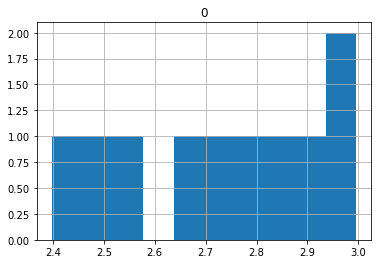

In [22]:
np.log(temp+10).hist()
plt.show()

In [25]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2846.0,1459.280394,843.239743,0.0,728.25,1459.500000,2189.75,2918.0
MSSubClass,2846.0,56.848208,42.175166,20.0,20.00,50.000000,70.00,190.0
LotFrontage,2846.0,69.260044,21.131996,21.0,60.00,69.284161,80.00,313.0
LotArea,2846.0,9777.120169,5172.515127,1300.0,7416.25,9360.000000,11412.75,115149.0
OverallQual,2846.0,6.064301,1.381428,1.0,5.00,6.000000,7.00,10.0
OverallCond,2846.0,5.573788,1.109791,1.0,5.00,5.000000,6.00,9.0
YearBuilt,2846.0,1971.324666,30.216536,1872.0,1953.00,1973.000000,2001.00,2010.0
YearRemodAdd,2846.0,1984.196767,20.947955,1950.0,1965.00,1993.000000,2004.00,2010.0
MasVnrArea,2846.0,97.847024,168.568193,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,2846.0,429.143508,426.074522,0.0,0.00,363.500000,723.50,1965.0


In [132]:
continuous_variables = list(df_test.describe().keys())
continuous_variables.remove('OverallQual')
continuous_variables.remove('OverallCond')
continuous_variables.remove(continuous_variables[0])
response = continuous_variables[-1]
continuous_variables.remove(response)
#continuous_variables.remove('Id')

In [133]:
categorical_variables = list(set(df_test.columns)-set(continuous_variables))
categorical_variables.remove(response)
#categorical_variables.remove('Id')

In [111]:
import category_encoders as en
bin_enc = en.BinaryEncoder()

In [114]:
from sklearn.preprocessing import LabelEncoder
lbl_encoding = LabelEncoder()

In [134]:
temp = df_test.iloc[:1400,].copy()
for cat in categorical_variables:
    temp[cat] = lbl_encoding.fit_transform(temp[cat])

In [139]:
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func = chi2, k = 25)
temp = best_features.fit(temp[categorical_variables], temp[response])

In [140]:
chi2_scores = pd.concat([pd.DataFrame(categorical_variables, columns=['feature']), pd.DataFrame(temp.scores_, columns = ['scores'])], axis = 1)
chi2_scores

,feature,scores
0,KitchenQual,266.252777
1,MSZoning,110.828760
2,Foundation,290.120855
3,BsmtCond,99.557445
4,HouseStyle,794.872718
5,PavedDrive,89.305557
6,OverallQual,415.519251
7,HeatingQC,1433.312952
8,ExterQual,179.401259
9,BsmtExposure,418.360250


In [141]:
chi2_scores.sort_values(by=['scores'],axis=0,ascending=False)

,feature,scores
35,MSSubClass,2493.536964
13,RoofMatl,2371.640380
10,Neighborhood,2100.244204
24,BldgType,1924.177054
7,HeatingQC,1433.312952
32,GarageType,1065.467672
4,HouseStyle,794.872718
18,LotShape,779.012379
11,Exterior2nd,772.494515
20,BsmtFinType1,772.193223


In [144]:
chi2_scores.describe()

,scores
count,41.000000
mean,523.036476
std,651.616376
min,1.653552
25%,104.336472
50%,232.333333
75%,747.824863
max,2493.536964


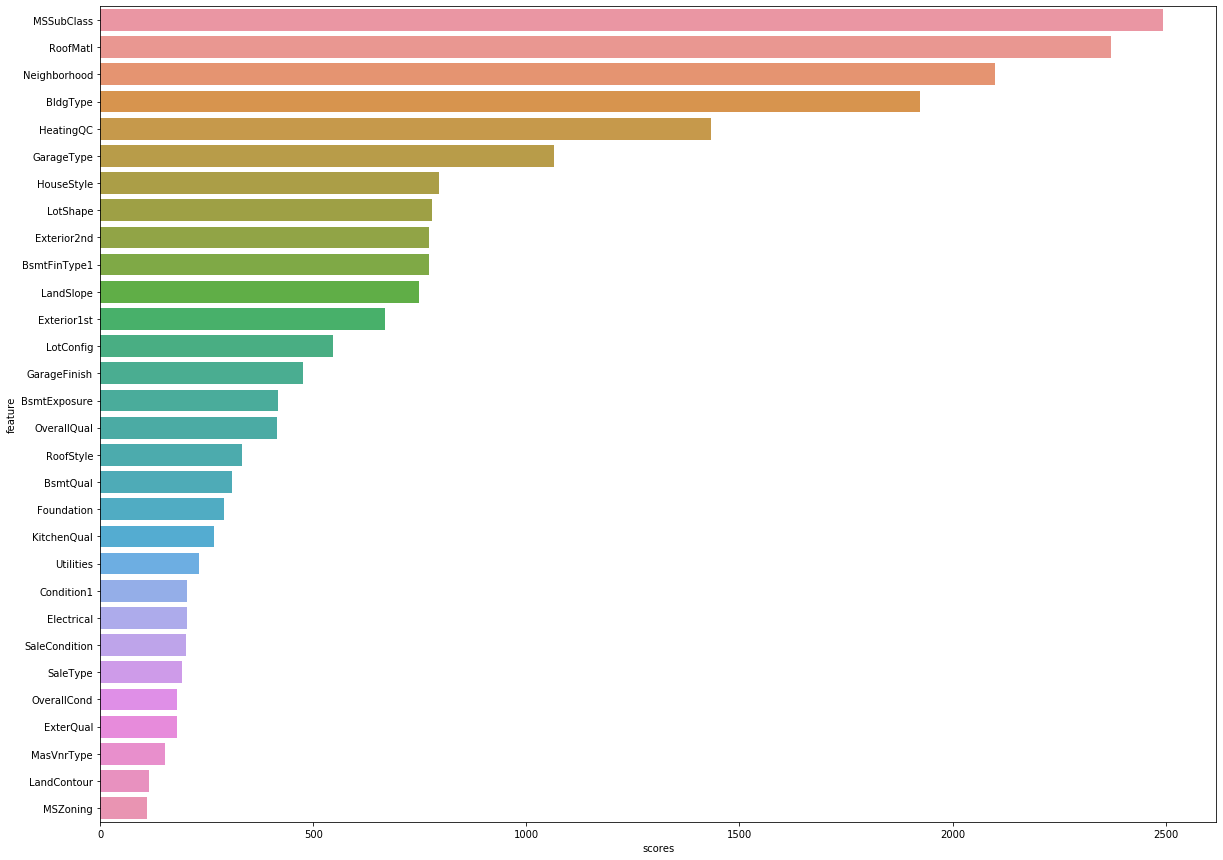

In [142]:
plt.figure(figsize=(20,15))
sns.barplot(x=chi2_scores.nlargest(n=30,columns=['scores']).scores,y=chi2_scores.nlargest(n=30,columns=['scores']).feature,orient='h')
#df.nlargest(n = 30, columns = ['scores']).plot(kind='bar',legend=['feature'])
plt.show()

In [151]:
temp = df_test.iloc[:1400,].copy()
for cat in categorical_variables:
    temp[cat] = lbl_encoding.fit_transform(temp[cat])

In [152]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()
temp = tree.fit(temp[categorical_variables], temp[response])

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [153]:
feature_importances=pd.concat([pd.DataFrame(categorical_variables,columns=['feature']),pd.DataFrame(temp.feature_importances_,columns=['importance'])],axis=1)

In [155]:
feature_importances.sort_values(by='importance',axis=0,ascending=False)

,feature,importance
10,Neighborhood,0.064998
20,BsmtFinType1,0.063945
6,OverallQual,0.062962
11,Exterior2nd,0.046162
33,Exterior1st,0.043106
39,MasVnrType,0.042795
37,OverallCond,0.042672
9,BsmtExposure,0.040439
35,MSSubClass,0.039019
16,LotConfig,0.037369


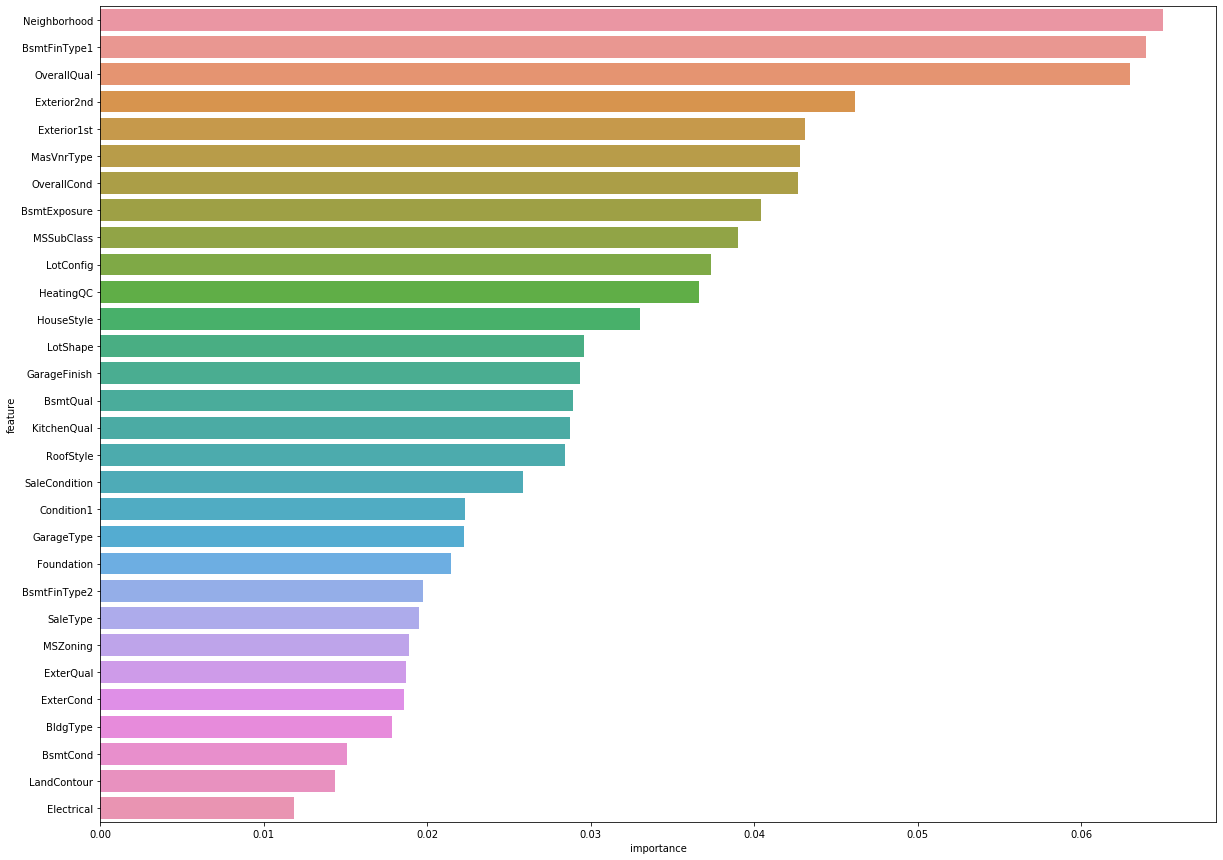

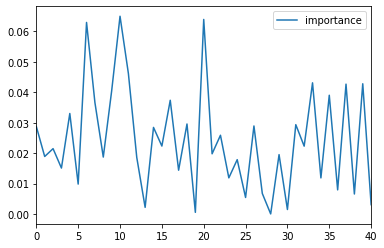

In [156]:
plt.figure(figsize=(20,15))
sns.barplot(x=feature_importances.nlargest(n=30,columns=['importance']).importance,y=feature_importances.nlargest(n=30,columns=['importance']).feature,orient='h')
#df.nlargest(n = 30, columns = ['scores'])
feature_importances.plot(kind='line')
plt.show()

In [157]:
merged_df=pd.merge(left=chi2_scores,right=feature_importances,how='left',left_on='feature',right_on='feature')

In [159]:
merged_df.sort_values(by=['scores'],ascending=False)

,feature,scores,importance
35,MSSubClass,2493.536964,0.039019
13,RoofMatl,2371.640380,0.002158
10,Neighborhood,2100.244204,0.064998
24,BldgType,1924.177054,0.017841
7,HeatingQC,1433.312952,0.036620
32,GarageType,1065.467672,0.022281
4,HouseStyle,794.872718,0.033020
18,LotShape,779.012379,0.029566
11,Exterior2nd,772.494515,0.046162
20,BsmtFinType1,772.193223,0.063945


In [40]:
df_test[continuous_variables].corr()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,0.008931,-0.024014,-0.040746,-0.016581,-0.050438,-0.025126,-0.016945,0.018249,-0.014451,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.420197,-0.201730,0.034409,0.043315,0.005422,-0.064302,-0.072520,-0.125978,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.024014,-0.420197,1.000000,0.520226,0.099702,0.066936,0.218932,0.219572,0.059371,0.108980,...,0.126162,0.164491,0.023942,0.041094,0.068635,0.168445,0.035428,0.009399,-0.010031,0.360689
LotArea,-0.040746,-0.201730,0.520226,1.000000,0.024128,0.021612,0.125354,0.194021,0.084055,0.021361,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
YearBuilt,-0.016581,0.034409,0.099702,0.024128,1.000000,0.612235,0.312579,0.279547,-0.027591,0.130457,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.066936,0.021612,0.612235,1.000000,0.196117,0.152056,-0.062125,0.165099,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025126,0.005422,0.218932,0.125354,0.312579,0.196117,1.000000,0.301999,-0.015633,0.089712,...,0.165839,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117,-0.018457,0.475210
BsmtFinSF1,-0.016945,-0.064302,0.219572,0.194021,0.279547,0.152056,0.301999,1.000000,-0.055045,-0.477404,...,0.223471,0.124153,-0.099710,0.050908,0.096821,0.084462,0.093295,-0.000942,0.022556,0.386420
BsmtFinSF2,0.018249,-0.072520,0.059371,0.084055,-0.027591,-0.062125,-0.015633,-0.055045,1.000000,-0.238241,...,0.098389,-0.005875,0.032739,-0.023279,0.063301,0.044524,-0.005139,-0.009592,0.008883,-0.011378
BsmtUnfSF,-0.014451,-0.125978,0.108980,0.021361,0.130457,0.165099,0.089712,-0.477404,-0.238241,1.000000,...,-0.039298,0.119753,0.005006,-0.005810,-0.049157,-0.032273,-0.010492,0.022604,-0.038015,0.214479


In [46]:
from scipy.stats import zscore
zscore(df_test.SalePrice[:1440])

array([ 0.34493149,  0.00589108,  0.53328728, ...,  2.68201239,
       -0.39342318,  0.20052539])

In [98]:
mask = np.mask_indices(len(continuous_variables),np.triu)
mask

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6, 

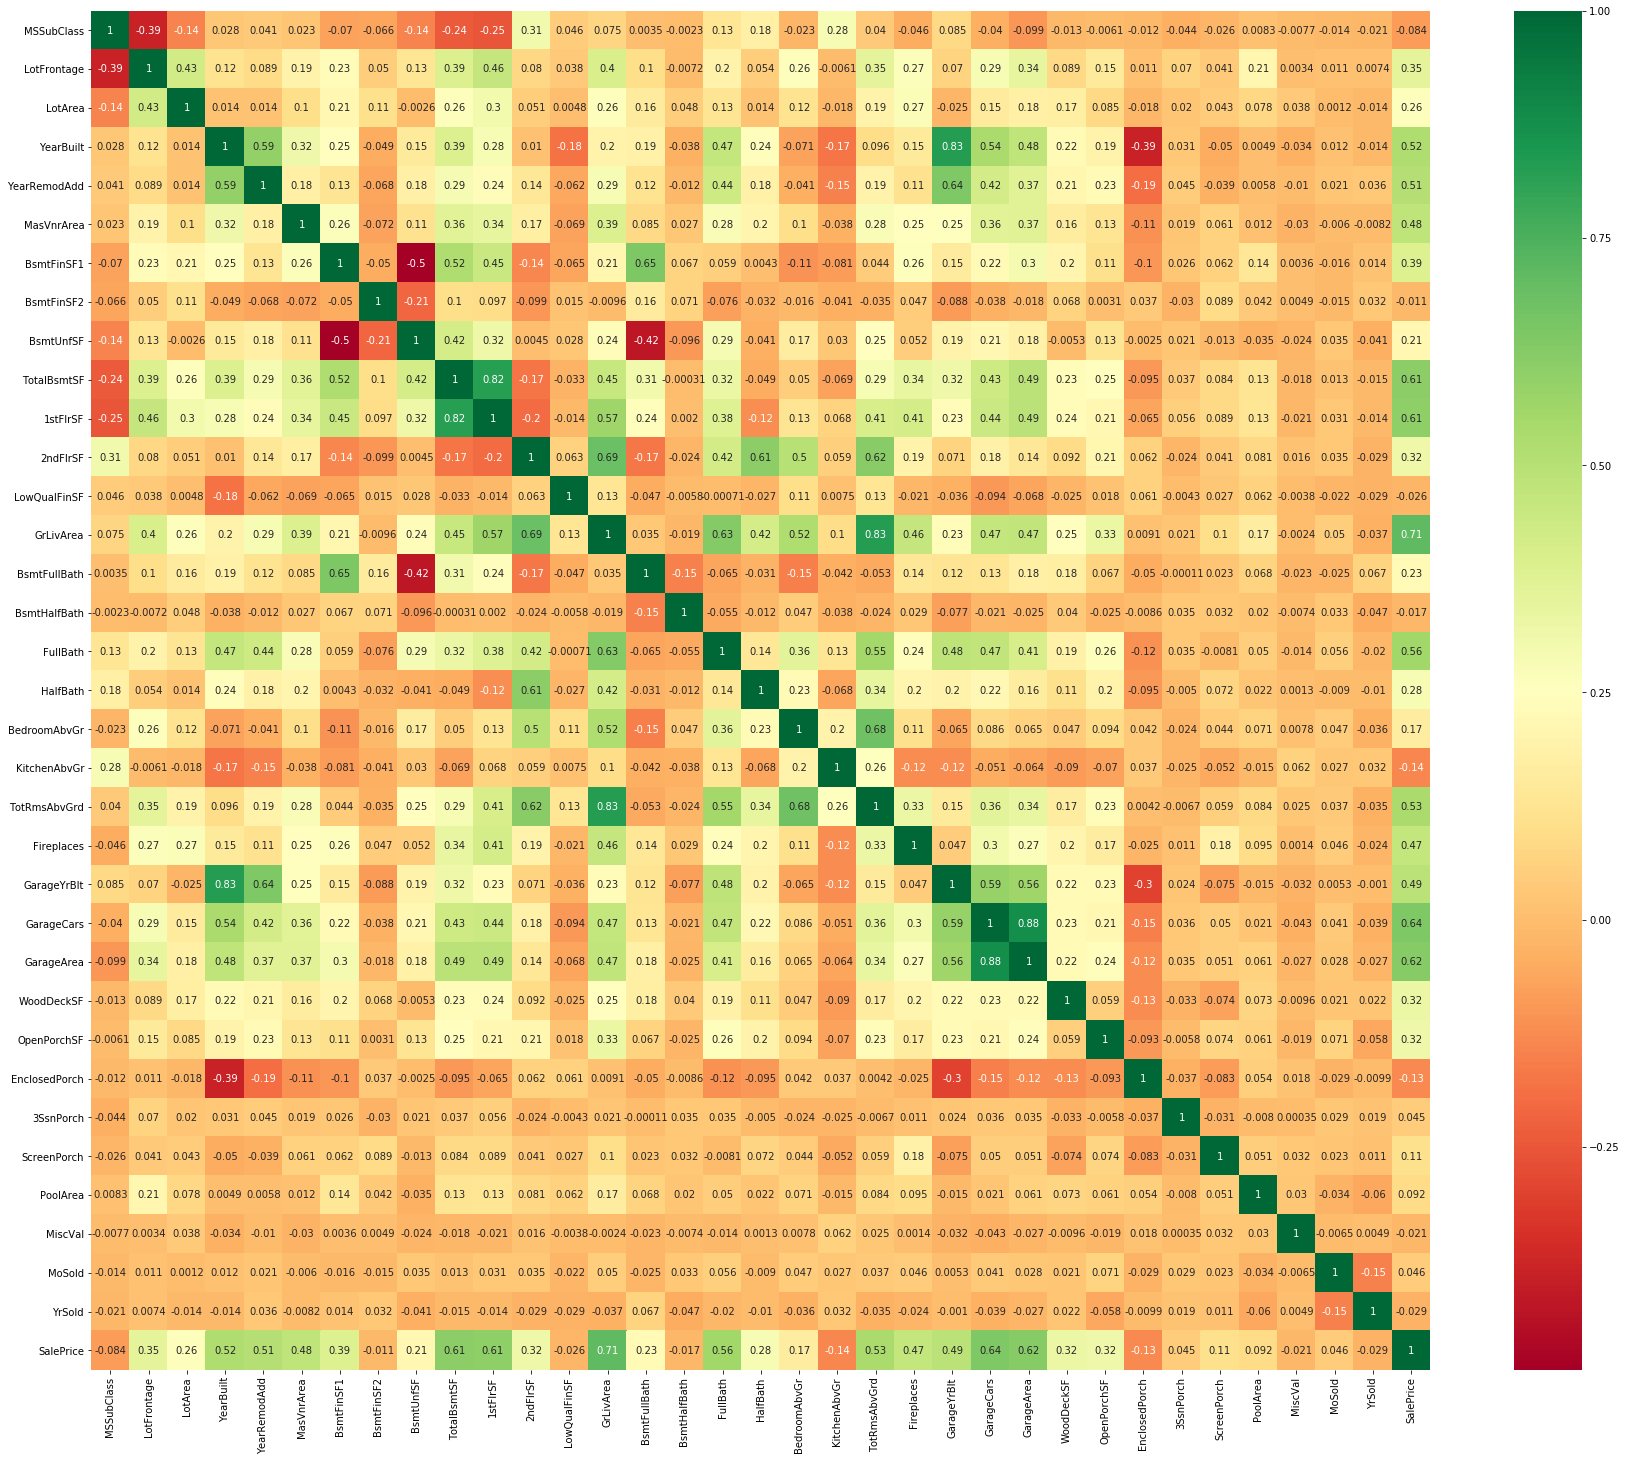

In [119]:
plt.figure(figsize=(30,25))
sns.heatmap(df_test[continuous_variables].corr(),annot=True, cmap='RdYlGn')
plt.show()

BsmtUnfSF is normally right skewed


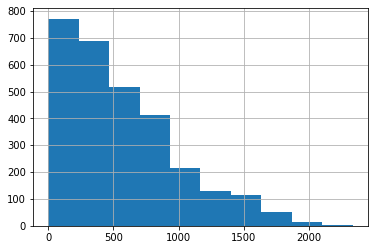

NameError: name 'stats' is not defined

In [3]:
print('BsmtUnfSF is normally right skewed')
temp=df_test.BsmtUnfSF
temp.hist()
plt.show()
print('skewness\t',stats.skew(temp, axis=0))
print('skewness test\t',stats.skewtest(temp, axis=0))
print('kurtosis\t',stats.kurtosis(temp, axis=0))
print('kurtosis test\t',stats.kurtosistest(temp, axis=0))

BsmtFinSF2 is extremely right skewed


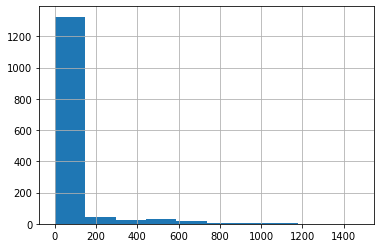

skewness 4.250888017057445
kurtosis 20.04041549471293
skewness test SkewtestResult(statistic=30.244531410349857, pvalue=6.1568580468349476e-201)
kurtosis test KurtosistestResult(statistic=19.305751128557493, pvalue=4.805157094697884e-83)


In [147]:
print('BsmtFinSF2 is extremely right skewed')
temp=df_test.BsmtFinSF2
temp.hist()
plt.show()
print('skewness',stats.skew(temp, axis=0))
print('kurtosis',stats.kurtosis(temp, axis=0))
print('skewness test',stats.skewtest(temp, axis=0))
print('kurtosis test',stats.kurtosistest(temp, axis=0))

GarageYrBlt is normally left skewed


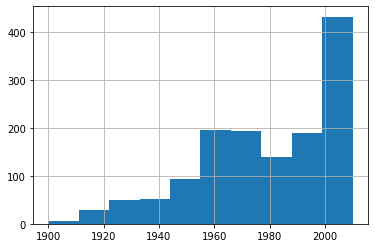

skewness -0.6487080129813099
kurtosis -0.42117353578557015
skewness test SkewtestResult(statistic=-9.075049969614113, pvalue=1.1362535194432233e-19)
kurtosis test KurtosistestResult(statistic=-4.001590861082348, pvalue=6.291802519119311e-05)


In [155]:
print('GarageYrBlt is normally left skewed')
temp = df_test[df_test.GarageYrBlt.notnull()]['GarageYrBlt']
temp.hist()
plt.show()
print('skewness',stats.skew(temp, axis=0))
print('kurtosis',stats.kurtosis(temp, axis=0))
print('skewness test',stats.skewtest(temp, axis=0))
print('kurtosis test',stats.kurtosistest(temp, axis=0))

1/MasVnrArea is extremely left skewed


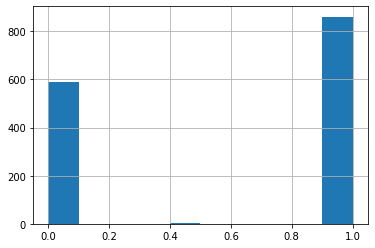

skewness -0.38182657449386964
kurtosis -1.8521427641271457
skewness test SkewtestResult(statistic=-5.774302363168428, pvalue=7.727256854881244e-09)
kurtosis test KurtosistestResult(statistic=76.50918098421504, pvalue=0.0)


In [189]:
print('1/MasVnrArea is extremely left skewed')
temp=1/(df_test[df_test.MasVnrArea.notnull()]['MasVnrArea']+1)
temp.hist()
plt.show()
print('skewness',stats.skew(temp, axis=0))
print('kurtosis',stats.kurtosis(temp, axis=0))
print('skewness test',stats.skewtest(temp, axis=0))
print('kurtosis test',stats.kurtosistest(temp, axis=0))

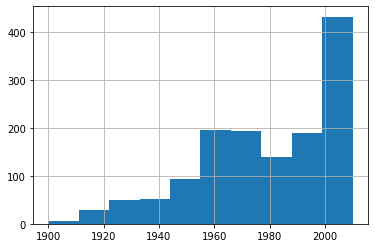

In [168]:
np.power(temp,1).hist()
plt.show()

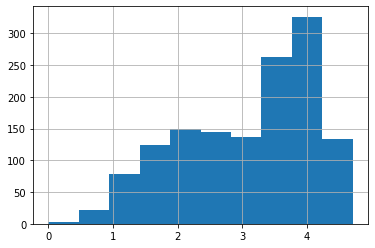

In [174]:
np.log(1+max(temp)-temp).hist()

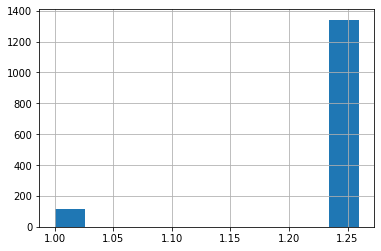

In [191]:
np.power(1+max(1/(df_test.BsmtUnfSF+1))-1/(df_test.BsmtUnfSF+1),1/3).hist()

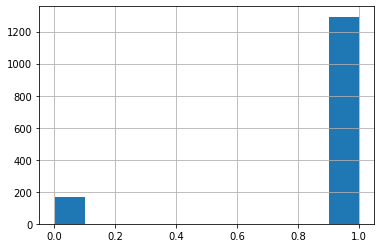

In [257]:
temp = 1/(df_test.BsmtFinSF2+1)
(temp).hist()

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


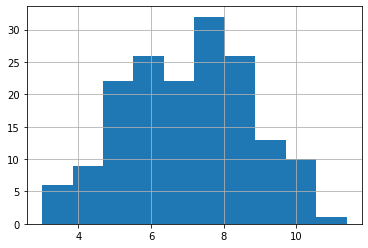

In [187]:
np.power(df_test.BsmtFinSF2-1-min(df_test.BsmtFinSF2),1/3).hist()

In [118]:
krish = df_test.copy()
krish.drop(krish.columns[0],axis=1,inplace=True)
krish.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [166]:
index_df = []
for cat in continuous_variables[:-2]:
    temp = krish[cat]
    scores = zscore(temp)
    indices = temp[(scores<-3)|(scores>3)].index
    index_df.extend(indices)
    #scores[(scores<-3)|(scores>3)]
    print(cat+'\t',str(len(indices))+'\t', round(len(indices)/len(temp),5)*100)
    print(indices)
    print('\n')

MSSubClass	 61	 2.09
Int64Index([   9,   48,   93,  125,  165,  246,  291,  300,  312,  335,  411,
             488,  520,  535,  635,  637,  703,  705,  713,  861,  969,  985,
            1030, 1062, 1144, 1186, 1190, 1266, 1393, 1416, 1525, 1539, 1556,
            1559, 1810, 1834, 1837, 2019, 2090, 2094, 2100, 2103, 2135, 2143,
            2146, 2191, 2264, 2472, 2475, 2476, 2481, 2566, 2579, 2718, 2726,
            2753, 2771, 2778, 2783, 2874, 2892],
           dtype='int64')


LotFrontage	 26	 0.8909999999999999
Int64Index([ 171,  197,  231,  249,  277,  313,  335,  706,  807,  909,  934,
            1107, 1127, 1173, 1182, 1211, 1298, 1337, 2240, 2259, 2264, 2513,
            2590, 2599, 2899, 2916],
           dtype='int64')


LotArea	 29	 0.993
Int64Index([  53,  249,  271,  313,  335,  384,  411,  451,  457,  523,  661,
             706,  769,  848, 1169, 1184, 1287, 1298, 1396, 1947, 2188, 2250,
            2263, 2264, 2549, 2599, 2607, 2617, 2900],
           dtype='int64')

In [179]:
outliers = pd.Series(index_df).value_counts()

In [187]:
outliers[outliers>3]
#len(continuous_variables)

2549    12
1298    12
1182     7
523      7
691      6
197      6
1974     6
635      6
769      5
2263     5
185      5
496      5
2599     5
2557     5
1350     5
2682     5
1386     4
224      4
335      4
2424     4
1671     4
2513     4
1230     4
1173     4
1790     4
1677     4
1863     4
1862     4
2188     4
1169     4
53       4
2710     4
828      4
1861     4
dtype: int64

In [64]:
from scipy.stats import stats
left=[]
right=[]
val=0
for i in continuous_variables:
    val=stats.skew(krish[krish[i].notnull()][i])
    if val>0:
        right.append(i)
    else:
        left.append(i)
    print(i+'\t', val)

Unnamed: 0	 0.0
MSSubClass	 1.3754573602849356
LotFrontage	 1.5300474182325723
LotArea	 12.822431401556724
YearBuilt	 -0.5998055475020266
YearRemodAdd	 -0.4510203770788569
MasVnrArea	 2.6115493751087344
BsmtFinSF1	 1.4252334408817189
BsmtFinSF2	 4.146033635959022
BsmtUnfSF	 0.9195083116601191
TotalBsmtSF	 1.1624837493331972
1stFlrSF	 1.4696044169256821
2ndFlrSF	 0.8616747488436027
LowQualFinSF	 12.088761003370664
GrLivArea	 1.269357688230336
BsmtFullBath	 0.6248321135450657
BsmtHalfBath	 3.9315938391525584
FullBath	 0.16760573326550954
HalfBath	 0.6945664946629632
BedroomAbvGr	 0.3263243492888351
KitchenAbvGr	 4.302254369609591
TotRmsAbvGrd	 0.7583669060998621
Fireplaces	 0.7334945989608231
GarageYrBlt	 -0.31880122190307636
GarageCars	 -0.21859251785229397
GarageArea	 0.241217781017102
WoodDeckSF	 1.8424328111184782
OpenPorchSF	 2.5351137294802557
EnclosedPorch	 4.003891220540856
3SsnPorch	 11.376064682827481
ScreenPorch	 3.9466937029936977
PoolArea	 16.89832791614449
MiscVal	 21.94719

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


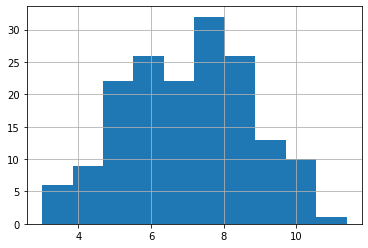

In [240]:
np.power(df_test.BsmtFinSF2-1-min(df_test.BsmtFinSF2),1/3).hist()

81

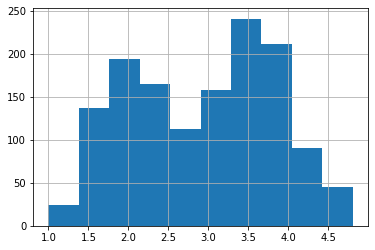

In [276]:
temp = np.power(1+max(df_test.GarageYrBlt)-df_test.GarageYrBlt,1/3)
temp.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0D270FC50>]],
      dtype=object)

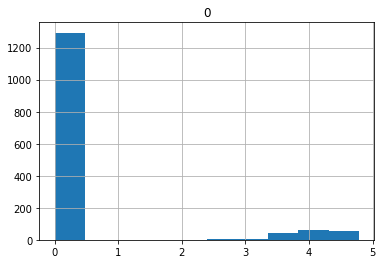

In [314]:
from scipy.stats import boxcox
pd.DataFrame(list(boxcox(df_test.BsmtFinSF2+1,-1/8))).hist()

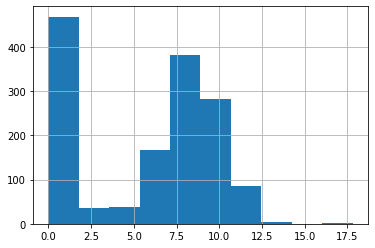

In [376]:
np.power(df_test.BsmtFinSF1, 1/3).hist()

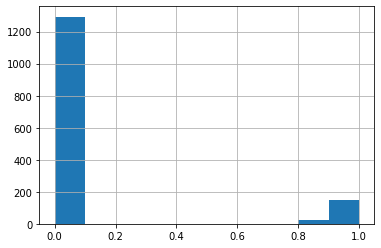

In [349]:
size = len(df_test.BsmtFinSF2)-1
helpful_percentile_linearization = df_test.BsmtFinSF2.rank(method='min').apply(lambda x: (x-1)/size)
helpful_percentile_linearization.hist()
#np.tanh(df_test.BsmtFinSF2).hist()

In [68]:
for cat in left:
    krish[cat] = np.power(1+max(krish[cat])-krish[cat],1/3)
for cat in right:
    krish[cat] = np.power(krish[cat],1/3)

In [69]:
for i in continuous_variables:
    val=stats.skew(krish[krish[i].notnull()][i])
    #if val>0:
    #    right.append(val)
    #else:
    #    left.append(val)
    print(i+'\t', val)

Unnamed: 0	 -0.8569567400443232
MSSubClass	 0.5543678428879962
LotFrontage	 -0.2806853645841805
LotArea	 1.4280366112045326
YearBuilt	 -0.17788007600448189
YearRemodAdd	 0.004966634460103252
MasVnrArea	 0.7062922636914931
BsmtFinSF1	 -0.34057860531093276
BsmtFinSF2	 2.6730344584799592
BsmtUnfSF	 -0.9936874391251421
TotalBsmtSF	 -2.7957552059064747
1stFlrSF	 0.42933619926646577
2ndFlrSF	 0.36165459605060457
LowQualFinSF	 8.932257647885791
GrLivArea	 0.3781984682090871
BsmtFullBath	 0.3582636277439776
BsmtHalfBath	 3.718898825116523
FullBath	 -1.5868120804571597
HalfBath	 0.5395783035724285
BedroomAbvGr	 -2.238795857509267
KitchenAbvGr	 -1.265162810653387
TotRmsAbvGrd	 0.19651161804192488
Fireplaces	 0.007308394661812265
GarageYrBlt	 -2.7810702000608463
GarageCars	 -0.2439775793530205
GarageArea	 -2.5236707557743627
WoodDeckSF	 0.2812944198069877
OpenPorchSF	 0.16472418349388734
EnclosedPorch	 2.0701997882454846
3SsnPorch	 9.01396357039186
ScreenPorch	 3.0090740705275727
PoolArea	 15.257

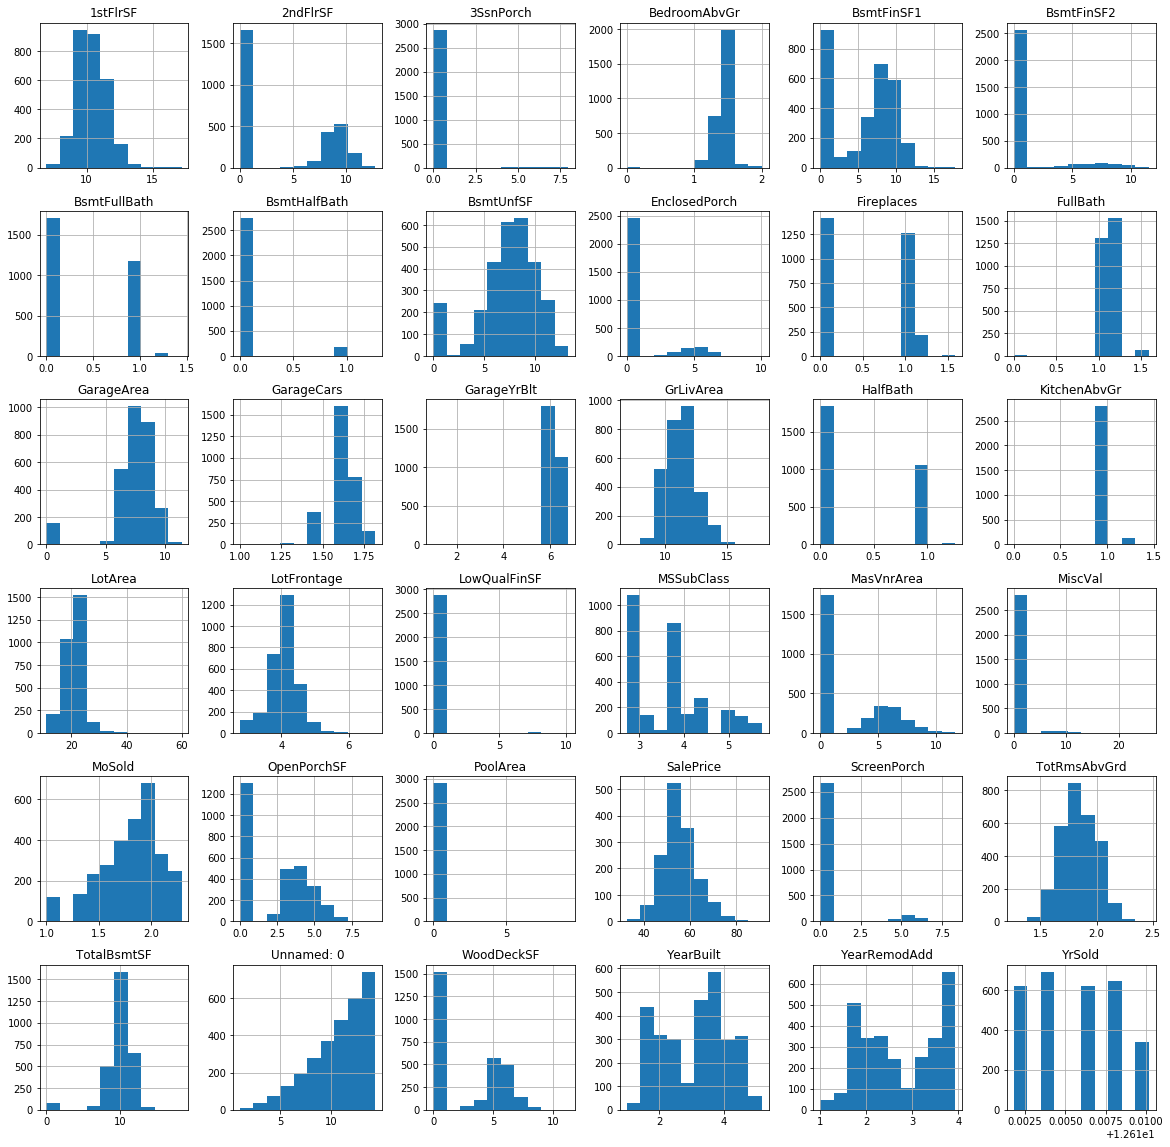

In [70]:
krish[continuous_variables].hist(figsize=(20,20))
plt.show()

In [371]:
krish[right].describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [223]:
krish[krish.LotFrontage.notnull()]['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
8        51.0
9        50.0
10       70.0
11       85.0
13       91.0
15       51.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
32       85.0
33       70.0
34       60.0
35      108.0
        ...  
1425     80.0
1426     81.0
1427     60.0
1428     60.0
1430     60.0
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1442     85.0
1444     63.0
1445     70.0
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1201, dtype: float64

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model,4)

In [108]:
temp = rfe.fit(df_test[continuous_variables[7:15]],df_test[continuous_variables[-1:]])

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
temp.support_

array([False, False,  True,  True,  True, False, False,  True])

In [191]:
pd.DataFrame(df_test.SalePrice.groupby(df_test.LotShape))

,0,1
0,IR1,2 223500 3 140000 4 250000 5...
1,IR2,12 144000 50 177000 52 110000 5...
2,IR3,264 73000 301 267000 313 375000 1...
3,Reg,0 208500 1 181500 6 307000 8...


In [193]:
oneAnova = stats.f_oneway(df_test[df_test.LotShape=='IR1']['SalePrice'],df_test[df_test.LotShape=='IR2']['SalePrice'])

In [200]:
from statsmodels.multivariate.manova import MANOVA

In [213]:
man = MANOVA.fit()

NotImplementedError: fit is not needed to use MANOVA. Callmv_test directly on a MANOVA instance.

,LotShape,LotConfig
0,Reg,Inside
1,Reg,FR2
2,IR1,Inside
3,IR1,Corner
4,IR1,FR2
5,IR1,Inside
6,Reg,Inside
7,IR1,Corner
8,Reg,Inside
9,Reg,Corner


In [177]:
pd.DataFrame(pd.DataFrame(best_features.scores_).T, columns=k.columns).T.sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [178]:
dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(k.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [183]:
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
136,BsmtQual_1,479.157025
39,ExterQual_2,378.990291
50,BsmtCond_2,306.733531
138,BsmtQual_3,285.459005
8,BsmtFinType2_2,270.394152
31,KitchenQual_2,263.359462
96,BsmtFinType1_1,237.232875
23,HeatingQC_2,192.297585
120,GarageFinish_2,189.576507
116,CentralAir_0,186.410552


In [170]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold()
constant_filter.fit()

In [189]:
np.median(df_test[continuous_variables].describe().T['std'])

30.21653551917113

In [193]:
corr_df = df_test.corr()
desc_df = df_test[continuous_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2846.0,69.260044,21.131996,21.0,60.00,69.284161,80.00,313.0
LotArea,2846.0,9777.120169,5172.515127,1300.0,7416.25,9360.000000,11412.75,115149.0
YearBuilt,2846.0,1971.324666,30.216536,1872.0,1953.00,1973.000000,2001.00,2010.0
YearRemodAdd,2846.0,1984.196767,20.947955,1950.0,1965.00,1993.000000,2004.00,2010.0
MasVnrArea,2846.0,97.847024,168.568193,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,2846.0,429.143508,426.074522,0.0,0.00,363.500000,723.50,1965.0
BsmtFinSF2,2846.0,46.541315,161.245613,0.0,0.00,0.000000,0.00,1526.0
BsmtUnfSF,2846.0,559.481297,435.012526,0.0,222.00,469.500000,801.00,2153.0
TotalBsmtSF,2846.0,1035.166120,403.527217,0.0,785.00,982.500000,1280.75,3206.0
1stFlrSF,2846.0,1141.369642,358.076655,334.0,872.00,1073.000000,1368.75,2898.0


In [222]:
desc_df[desc_df['std'] < 10]

,count,mean,std,min,25%,50%,75%,max
BsmtFullBath,2846.0,0.420942,0.514709,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2846.0,0.058327,0.238859,0.0,0.0,0.0,0.0,2.0
FullBath,2846.0,1.553408,0.536008,0.0,1.0,2.0,2.0,3.0
HalfBath,2846.0,0.371750,0.494855,0.0,0.0,0.0,1.0,2.0
BedroomAbvGr,2846.0,2.840478,0.785093,0.0,2.0,3.0,3.0,6.0
KitchenAbvGr,2846.0,1.038299,0.200899,0.0,1.0,1.0,1.0,3.0
TotRmsAbvGrd,2846.0,6.381940,1.485943,2.0,5.0,6.0,7.0,13.0
Fireplaces,2846.0,0.580112,0.627779,0.0,0.0,1.0,1.0,3.0
GarageCars,2846.0,1.752284,0.748134,0.0,1.0,2.0,2.0,5.0
MoSold,2846.0,6.210471,2.706558,1.0,4.0,6.0,8.0,12.0


In [221]:
df_test[list(desc_df[desc_df['std'] < 10].index.values)+ [response]].corr()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
BsmtFullBath,1.000000,-0.154033,-0.030556,-0.059832,-0.162565,-0.030194,-0.061382,0.143617,0.144920,-0.002307,0.043331,0.227388
BsmtHalfBath,-0.154033,1.000000,-0.062776,-0.064561,0.002775,-0.083193,-0.078633,0.020396,-0.046969,0.024500,-0.011967,-0.035958
FullBath,-0.030556,-0.062776,1.000000,0.142447,0.322619,0.149101,0.514323,0.225965,0.487485,0.042523,-0.011258,0.566006
HalfBath,-0.059832,-0.064561,0.142447,1.000000,0.244073,-0.083160,0.345080,0.196012,0.213700,-0.005689,-0.002381,0.289749
BedroomAbvGr,-0.162565,0.002775,0.322619,0.244073,1.000000,0.183604,0.674724,0.087984,0.094874,0.050709,-0.021362,0.175856
KitchenAbvGr,-0.030194,-0.083193,0.149101,-0.083160,0.183604,1.000000,0.260648,-0.112126,-0.037416,0.038824,0.027277,-0.136045
TotRmsAbvGrd,-0.061382,-0.078633,0.514323,0.345080,0.674724,0.260648,1.000000,0.305364,0.365906,0.050710,-0.037817,0.538592
Fireplaces,0.143617,0.020396,0.225965,0.196012,0.087984,-0.112126,0.305364,1.000000,0.309072,0.033826,-0.003358,0.461840
GarageCars,0.144920,-0.046969,0.487485,0.213700,0.094874,-0.037416,0.365906,0.309072,1.000000,0.040339,-0.025222,0.658992
MoSold,-0.002307,0.024500,0.042523,-0.005689,0.050709,0.038824,0.050710,0.033826,0.040339,1.000000,-0.156711,0.067042


In [219]:
mask = np.mask_indices(len(list(desc_df[desc_df['std'] < 10].index.values)+ [response]),np.triu)
sns.heatmap(df_test[list(desc_df[desc_df['std'] < 10].index.values)+ [response]].corr(),annot=True,mask=mask)
plt.show()

ValueError: Unable to coerce to Series, length must be 12: given 2